In [1]:
#importing all the required libraries and dependancies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
import pickle


In [2]:
#filter warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the csv file
df = pd.read_csv('Copper_Set.xlsx - Result 1.csv')
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [4]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
#converting the data type of the required columns

df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce').dt.date

In [6]:
#checking whether the dtype changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181670 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181670 non-null  object        
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(5

In [7]:
# calculating the no. of unique values in each column

for column in df.columns:
    print(f"{column}:{df[column].nunique()}")

id:181671
item_date:250
quantity tons:181672
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16562
product_ref:33
delivery date:26
selling_price:9795


In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [9]:
#quantity and selling price have negetive values
#convering the negetive values into null values

df['quantity tons'] =df['quantity tons'].apply(lambda x: np.nan if x<= 0 else x)
df['selling_price'] =df['selling_price'].apply(lambda x: np.nan if x<=0 else x )

In [10]:
#no.of null values in each column

df.isna().sum()

id                   2
item_date            3
quantity tons        5
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        8
dtype: int64

In [11]:
# id has unique value for each row and material reference has more than 50% null values so droppping both the columns
df.drop(columns=(['id','material_ref']),axis=1,inplace=True)

In [12]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [13]:
#Other columns contain negligible amount of null values only so dropping those null values

df.dropna(inplace=True)

df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [40]:
preprocessed_csv = df.to_csv('preprocessed_data.csv')

In [15]:
#encoding the categorical column

print(df['status'].unique())
print(sorted(df['item type'].unique()))


ordinal = OrdinalEncoder()

df['status'] = df['status'].map({'Draft':2, 'Lost':0, 'Not lost for AM':3,
                                  'Offerable':4, 'Offered':5, 'Revised':6, 'To be approved':7, 'Won':1, 'Wonderful':8})
df['item type'] = ordinal.fit_transform(df[['item type']])

print(df.status.unique())
sorted(df['item type'].unique())



['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI']
[1 2 7 0 3 8 6 5 4]


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

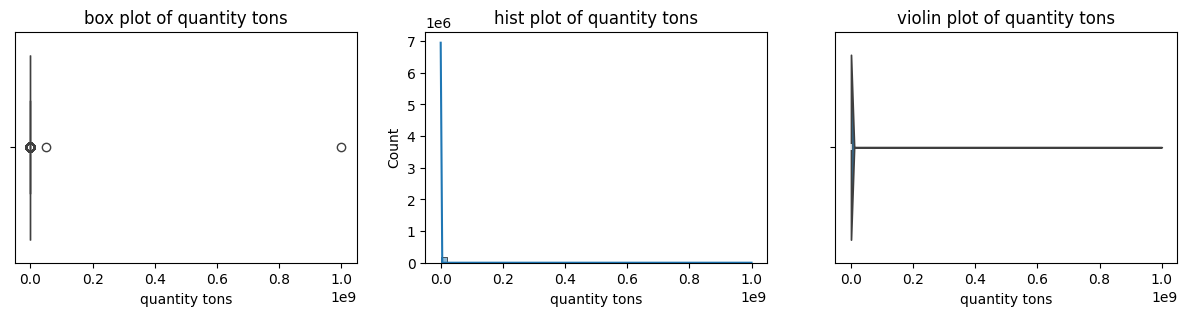

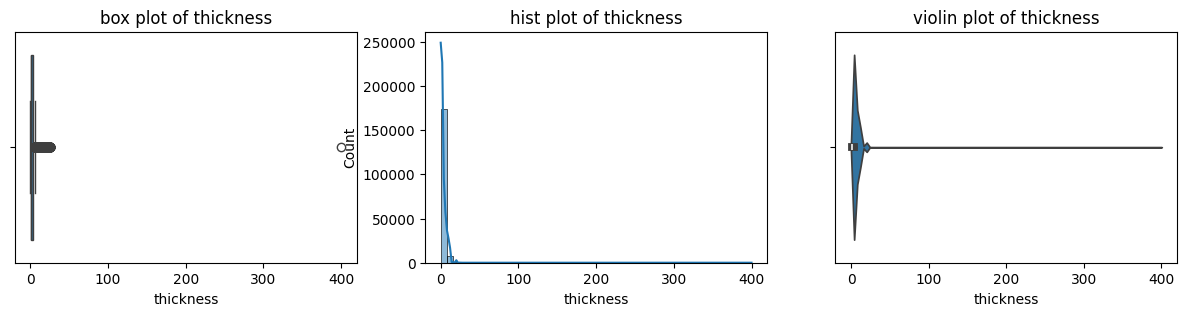

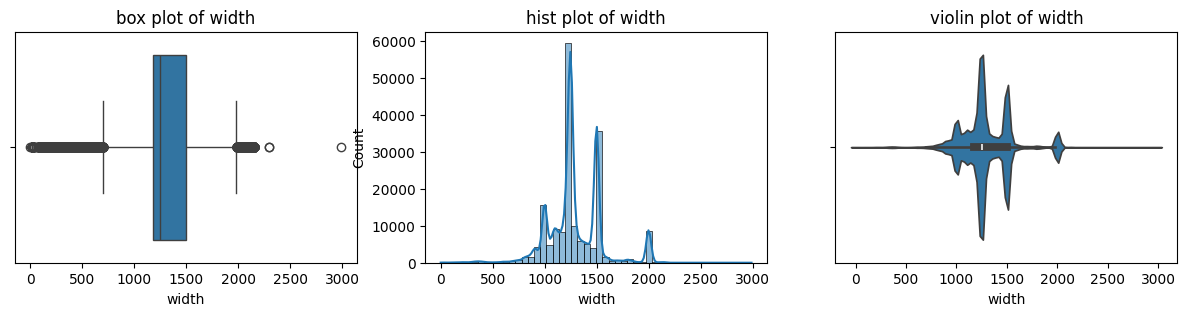

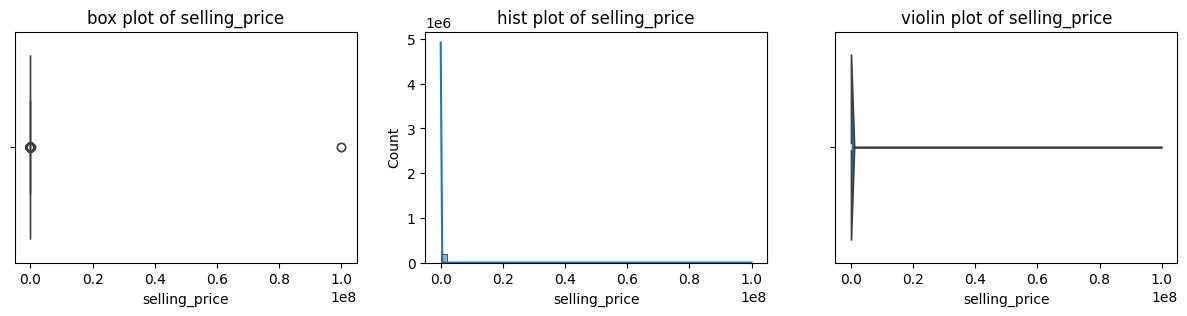

In [16]:
#so in status column lost is encoded into 0 and Won is 1

#plot the values to check skewness and outliers

def plot(df,column):
    plt.figure(figsize=(15,3))

    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'box plot of {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=column,kde=True,bins=50)
    plt.title(f'hist plot of {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column)
    plt.title(f'violin plot of {column}')

    plt.show()

columns = ['quantity tons','thickness','width','selling_price']

for column in columns:
    plot(df=df,column=column)


In [17]:
# except width other 3 columns has skewness
#quantity,thickness,selling price

#copying preprocessed dataframe for EDA

pp_df = df.copy()

pp_df['quantity tons'] = np.log(pp_df['quantity tons'])
pp_df['thickness'] = np.log(pp_df['thickness'])
pp_df['selling_price']  = np.log(pp_df['selling_price'])

In [18]:
print(df.tail(2))
pp_df.tail(2)

        item_date  quantity tons    customer  country  status  item type  \
181670 2020-07-02       4.235594  30200854.0     25.0       1        5.0   
181672 2020-07-02     406.686538  30200854.0     25.0       1        5.0   

        application  thickness   width  product_ref delivery date  \
181670         41.0       0.71  1250.0    164141591    2020-07-01   
181672         41.0       0.71  1240.0    164141591    2020-07-01   

        selling_price  
181670          619.0  
181672          607.0  


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
181670,2020-07-02,1.443523,30200854.0,25.0,1,5.0,41.0,-0.34249,1250.0,164141591,2020-07-01,6.428105
181672,2020-07-02,6.008043,30200854.0,25.0,1,5.0,41.0,-0.34249,1240.0,164141591,2020-07-01,6.408529


In [19]:
#checking the exponential of the selling price

print(np.exp(6.408529))

607.0001268268976


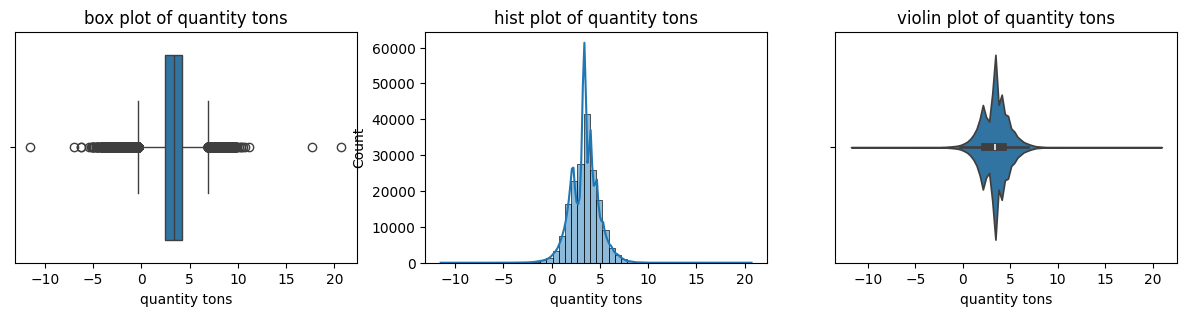

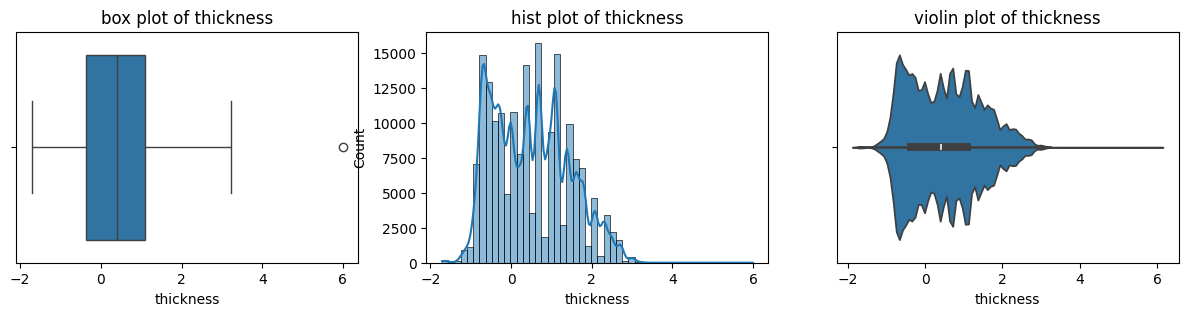

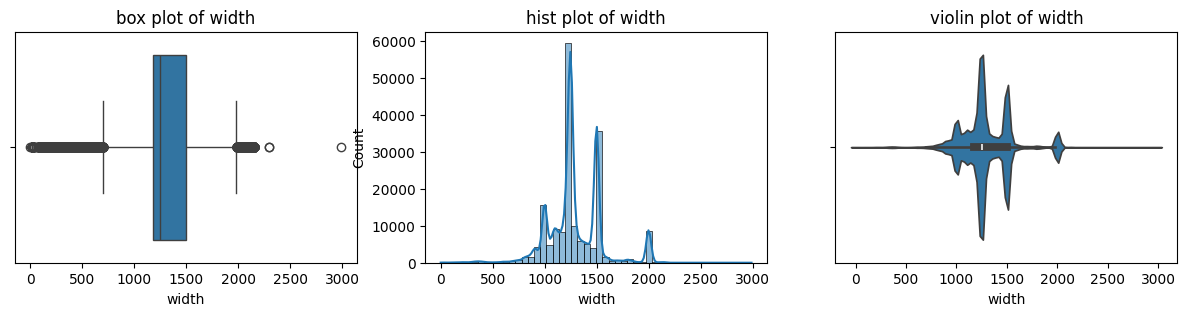

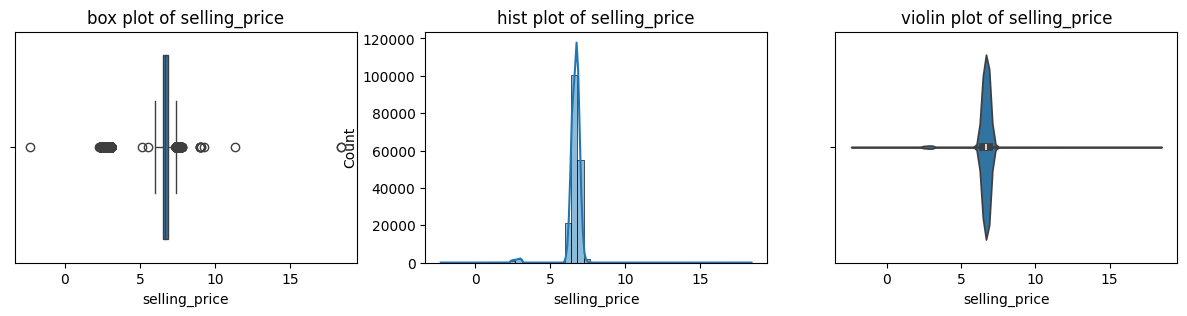

In [20]:
#visuallizing the logrithmic columns

for i in columns:
    plot(pp_df,i)

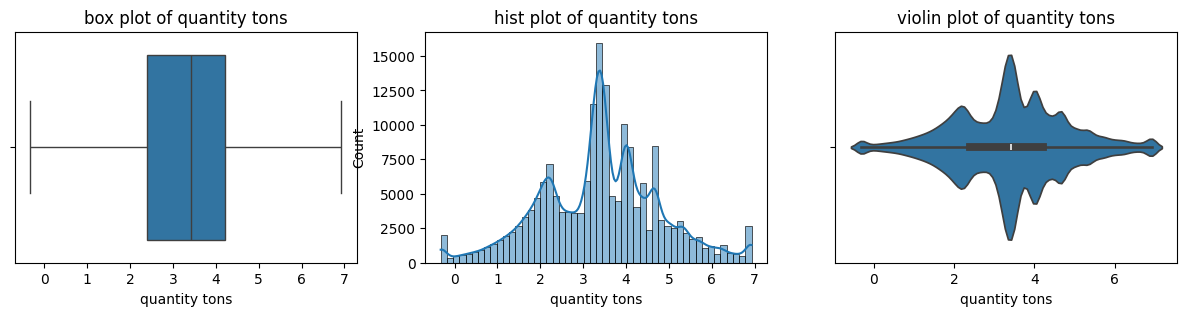

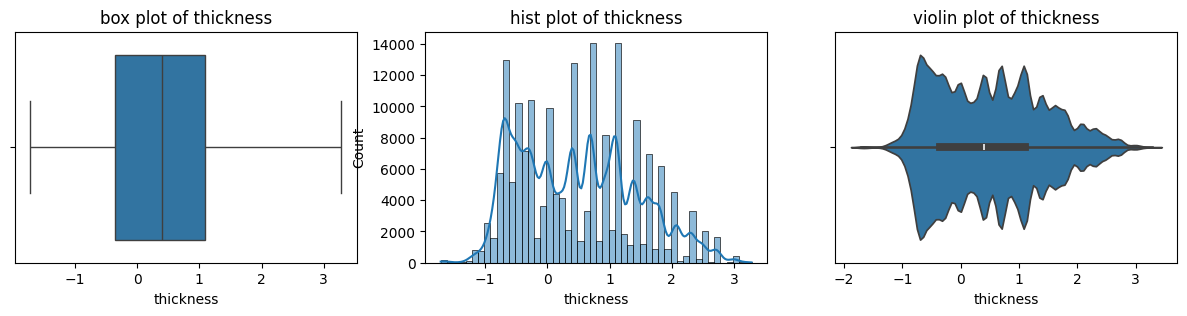

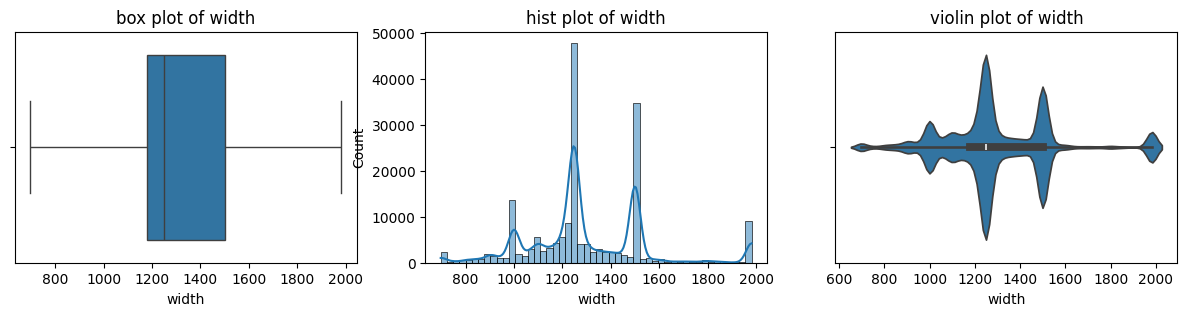

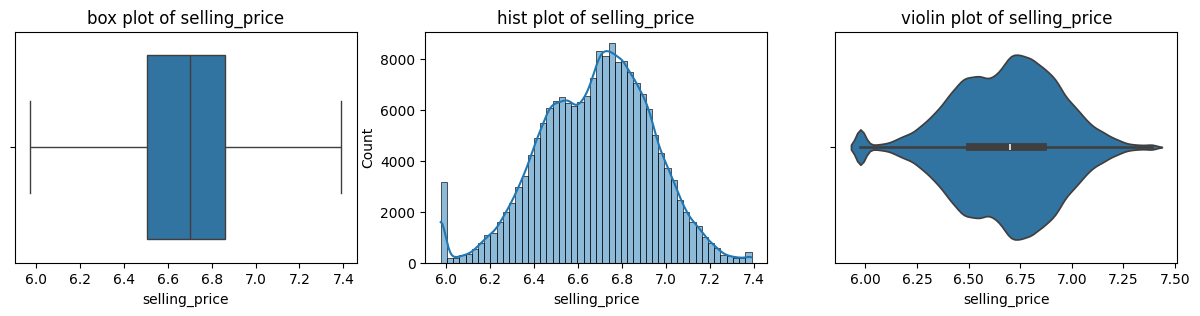

In [21]:
#skewness is solved now we have to take care of outliers

def outlier_removal(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)

    df[column] = df[column].clip(lower_bound,upper_bound)


for column in columns:
    outlier_removal(df=pp_df,column=column)
    plot(pp_df,column)   


    

In [22]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181622 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181622 non-null  datetime64[ns]
 1   quantity tons  181622 non-null  float64       
 2   customer       181622 non-null  float64       
 3   country        181622 non-null  float64       
 4   status         181622 non-null  int64         
 5   item type      181622 non-null  float64       
 6   application    181622 non-null  float64       
 7   thickness      181622 non-null  float64       
 8   width          181622 non-null  float64       
 9   product_ref    181622 non-null  int64         
 10  delivery date  181622 non-null  object        
 11  selling_price  181622 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 18.0+ MB


In [23]:
pp_df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

<Axes: >

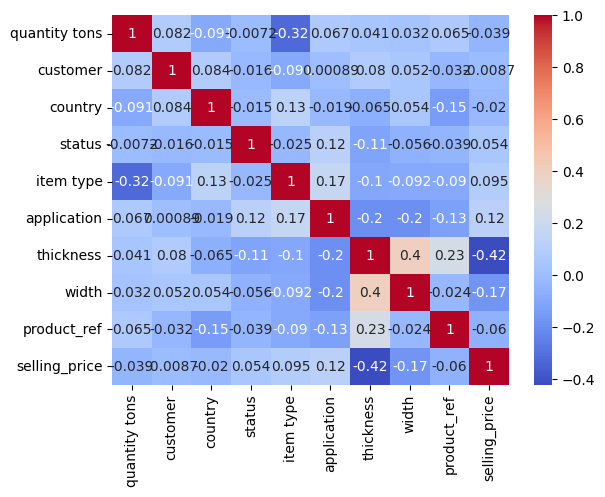

In [24]:
corelation_columns = ['quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']

corelation = pp_df[corelation_columns].corr()

sns.heatmap(corelation,annot=True,cmap='coolwarm')

In [25]:
# no columns has corelation above 50%

In [26]:
pp_df['status'].value_counts()

won = pp_df[pp_df['status']== 1]
lost = pp_df[pp_df['status'] == 0]

won.shape,lost.shape



((115997, 12), (34431, 12))

In [27]:
#we have imbalanced dataset to balance this we use under sampling

won = won.sample(n=34431)

won.shape,lost.shape

((34431, 12), (34431, 12))

In [28]:
classif = pd.concat([won,lost],axis=0)

In [29]:
classif

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
123193,2020-10-14,4.569718,30153956.0,30.0,1,5.0,41.0,-0.597837,1230.0,611993,2021-01-01,7.040536
78220,2020-12-14,3.734891,30206203.0,26.0,1,5.0,41.0,0.405465,1250.0,611993,2021-01-01,6.804615
39139,2021-02-15,2.693233,30201881.0,25.0,1,5.0,25.0,-0.510826,1072.0,628377,2021-07-01,6.821107
29757,2021-03-01,2.277487,30202645.0,32.0,1,2.0,10.0,1.098612,1500.0,1693867550,2021-04-01,6.761573
98929,2020-11-20,3.225248,30201846.0,25.0,1,3.0,10.0,1.791759,1500.0,1670798778,2021-01-01,6.419995
...,...,...,...,...,...,...,...,...,...,...,...,...
181527,2020-07-02,4.156686,30161559.0,30.0,0,3.0,10.0,1.766442,1525.0,640665,2020-08-01,6.124683
181529,2020-07-02,4.025862,30161559.0,30.0,0,3.0,10.0,2.060514,1500.0,640665,2020-08-01,6.126869
181531,2020-07-02,5.328963,30161559.0,30.0,0,3.0,10.0,1.348073,1830.0,640665,2020-08-01,6.131226
181533,2020-07-02,4.634669,30198408.0,25.0,0,3.0,10.0,0.336472,1150.0,1668701718,2020-07-01,6.586172


In [30]:
X = classif.drop(['status','item_date','delivery date'],axis=1).values
y = classif['status'].values
X.shape,y.shape

((68862, 9), (68862,))

In [31]:
# splitting the dataset for training and testing 

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.15,
                                                 stratify=y,
                                                 random_state=3)

In [32]:
def right_model(model,xtrain,xtest,y_train,y_test):
    #fit the model on training data
    algorithm = model().fit(xtrain,y_train)

    #predict train and test data
    train_pred = algorithm.predict(xtrain)
    test_pred = algorithm.predict(xtest)

    #evaluation metrics
    train_acc = accuracy_score(y_train,train_pred)
    train_precision = precision_score(y_train,train_pred)
    train_recall = recall_score(y_train,train_pred)
    train_f1 = f1_score(y_train,train_pred)

    test_acc = accuracy_score(y_test,test_pred)
    test_precision = precision_score(y_test,test_pred)
    test_recall = recall_score(y_test,test_pred)
    test_f1 = f1_score(y_test,test_pred)

    print(f"model name: {model.__name__}, train acc: {train_acc}, train precision: {train_precision}, train recall: {train_recall}, train f1: {train_f1}, test acc: {test_acc}, test precision: {test_precision}, test recall: {test_recall}, test f1 score: {test_f1}")


In [33]:
logistic_model = LogisticRegression
decision_tree_model = DecisionTreeClassifier
xgboost_model =XGBClassifier
random_forest_model = RandomForestClassifier

models = [ logistic_model,decision_tree_model,xgboost_model,random_forest_model]

In [34]:
for model in models:
   
    right_model(model, X_train, X_test, y_train, y_test)

model name: LogisticRegression, train acc: 0.5411911433062256, train precision: 0.5292888554143687, train recall: 0.7443791430328709, train f1: 0.6186723464678736, test acc: 0.5420135527589545, test precision: 0.5301137940605052, test recall: 0.739593417231365, test f1 score: 0.6175733570447013
model name: DecisionTreeClassifier, train acc: 1.0, train precision: 1.0, train recall: 1.0, train f1: 1.0, test acc: 0.8848015488867377, test precision: 0.8925538218447561, test recall: 0.8749273959341723, test f1 score: 0.8836527180289402
model name: XGBClassifier, train acc: 0.9008747351875896, train precision: 0.927894084178277, train recall: 0.8693022620105242, train f1: 0.8976430738832828, test acc: 0.8712487899322362, test precision: 0.9025824060466093, test recall: 0.8323330106485963, test f1 score: 0.8660354552780016
model name: RandomForestClassifier, train acc: 1.0, train precision: 1.0, train recall: 1.0, train f1: 1.0, test acc: 0.9169409486931268, test precision: 0.9424696938565852

In [35]:
# though the random forest model tend to overfit we get test accuracy,precicon and everything around 90% so we don't have to worry.

#saving the trained  random forest model

status_predictor_model = random_forest_model().fit(X_train,y_train)


file_path ='random_forest_model.pkl'

with open(file_path,'wb') as f:
    pickle.dump(status_predictor_model,f)

In [36]:
classif.tail(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
181535,2020-07-02,4.664121,30198408.0,25.0,0,3.0,10.0,0.336472,1146.0,1668701718,2020-07-01,6.588926


In [37]:
X_new = np.array([[4.664121,30198408.0,25.0,3,10.0,0.336472,1146.0,1668701718,6.588926]])
X_new

array([[4.66412100e+00, 3.01984080e+07, 2.50000000e+01, 3.00000000e+00,
        1.00000000e+01, 3.36472000e-01, 1.14600000e+03, 1.66870172e+09,
        6.58892600e+00]])

In [38]:
#load the model for prediction

with open(file_path,'rb') as f:
    loaded_model = pickle.load(f)

In [39]:
prediction = loaded_model.predict(X_new)
if prediction[0] == 0:
    print("Lost")
elif prediction[0]==1:
    print("Won")

Lost
